<div class="alert alert-block alert-info" style="text-align: center;">
    <h1>42577 Introduction to Business Analytics - Fall 2023</h1>
    <h1>Project Milestone</h1>
    <!-- Add a break for spacing and use the strong tag for bold -->
    <br>
    Students:
    <br>
    <strong>Asimina Athanasiadi - s222771</strong>
    <br>
    <strong>Nikolaos Karageorgos - s222654</strong>
    <br>
    <strong>Marios Dimitrios Lianos - s233558</strong>
    <br>
    <strong>Charalampos Spiliopoulos - s222498</strong>
</div>

<div class="alert alert-block alert-info" style="text-align: center;">
<h2>Milestone Summary</h2>
<br>
Initially, we conduct data manipulation scrutinizing the trip dataset for missing values. Next, some exploratory data analysis is performed, we calculate detailed quantiles and percentiles for trip durations to understand the range and distribution, particularly targeting and filtering out extreme outliers to refine the data quality. Subsequent steps convert time fields to datetime format for temporal analysis and encode categorical variables. We provide visualizations such as histograms showcasing trip duration and user age distributions. Then, the elbow method is used to find the optimal number of clusters to be used in K-means based on the starting bike station locations. Additionally, the cluster with the highest demand is identified while the analysis wraps up by breaking down the bike trip data into hours, showing when and where bikes are picked up and returned. Thus, we are ready to continue the project by implementing supervised machine learning techniques and make predictions.
</div>


<div class="alert alert-block alert-info" style="text-align: center;">
<h3>Necessary Libraries & Dataset importing</h3></div>


In [172]:
import pandas as pd
import numpy as np
import folium
import os
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("Trips_2018.csv")

<div class="alert alert-block alert-info" style="text-align: center;">
<h2>Data Preprocessing & Exploratory Analysis</h2></div>



<div class="alert alert-block alert-info">
We're inspecting the dataset for any null values and plan to remove any incomplete records to ensure data quality. It can be seen below in the dataframe that there are many observations that have NaN values in the columns of start_station_id and end_station_id. So, this subset is discarded from the dataset.
</div>

In [6]:
df[df.isnull().any(axis=1)] 

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
10413518,10413518,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,40.857,-73.890,NaN,40.857,-73.890,34426,Subscriber,1971,2
10413697,10413697,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,40.857,-73.890,NaN,40.857,-73.887,34428,Subscriber,1976,2
10415434,10415434,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,40.857,-73.890,NaN,40.857,-73.890,34428,Subscriber,1976,2
10415668,10415668,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,40.845,-73.902,NaN,40.857,-73.890,34525,Subscriber,1988,1
10417031,10417031,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,40.857,-73.890,NaN,40.857,-73.890,34548,Subscriber,1986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17390711,17390711,589,2018-12-24 14:22:12.3950,2018-12-24 14:32:01.6410,NaN,40.863,-73.899,NaN,40.860,-73.905,34463,Subscriber,1986,2
17393046,17393046,362,2018-12-24 15:34:09.8420,2018-12-24 15:40:12.1510,NaN,40.860,-73.905,NaN,40.863,-73.902,34463,Subscriber,1986,2
17393363,17393363,276,2018-12-24 15:44:26.6440,2018-12-24 15:49:03.3450,NaN,40.863,-73.902,NaN,40.860,-73.902,34463,Subscriber,1986,2
17423361,17423361,626,2018-12-26 15:08:40.3100,2018-12-26 15:19:06.8170,NaN,40.860,-73.905,NaN,40.845,-73.914,34463,Subscriber,1991,1


In [7]:
df = df.dropna(subset=['start_station_id'])

In [8]:
df.shape

(17545842, 14)

<div class="alert alert-block alert-info">
The 'Unnamed: 0' column is dropped from the dataset as it merely replicated the row indices, providing no additional valuable information for our analysis.    </div>

In [9]:
df = df.drop('Unnamed: 0', axis=1)

<div class="alert alert-block alert-info">
    After the cleanup, we verify that there are no remaining null values that could potentially skew our data analysis.    </div>

In [10]:
## Checking for null values left
df[df.isnull().any(axis=1)] 

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender


In [11]:
df.shape

(17545842, 13)

<div class="alert alert-block alert-info">
    Some `start_station_ids` may appear for more than one location, indicating potential errors in the dataset.  By grouping the data by `start_station_id` and counting unique latitude and longitude combinations, we can find stations with multiple recorded locations and then we filter them out.     </div>

In [12]:
# Group by 'start_station_id' and count the unique latitudes and longitudes
unique_location_counts = df.groupby('start_station_id').agg({
    'start_station_latitude': 'nunique',
    'start_station_longitude': 'nunique'
}).reset_index()


# Find station IDs with more than one unique latitude or longitude
stations_with_multiple_locations = unique_location_counts[
    (unique_location_counts['start_station_latitude'] > 1) | 
    (unique_location_counts['start_station_longitude'] > 1)
]

print(stations_with_multiple_locations)


     start_station_id  start_station_latitude  start_station_longitude
268             530.0                       2                        2


<div class="alert alert-block alert-info">
It appears that the difference is minimal and thus it will not affect the result of the clustering in any way.
    </div>

In [13]:
location_counts = df.groupby(['start_station_id', 'start_station_latitude', 'start_station_longitude']).size().reset_index(name='count')

# Sort the results for better readability (optional)
location_counts_sorted = location_counts.sort_values(by=['start_station_id', 'count'], ascending=[True, False])

print(location_counts_sorted)

     start_station_id  start_station_latitude  start_station_longitude  count
0                72.0               40.767272               -73.993929  38405
1                79.0               40.719116               -74.006667  27198
2                82.0               40.711174               -74.000165  10217
3                83.0               40.683826               -73.976323  13134
4               119.0               40.696089               -73.978034   3241
..                ...                     ...                      ...    ...
814            3716.0               40.753599               -73.937956    107
815            3718.0               40.727464               -73.979504   2014
816            3719.0               40.683223               -73.973812    222
817            3720.0               40.684617               -73.987213     62
818            3721.0               40.767549               -73.920933    238

[819 rows x 4 columns]


<div class="alert alert-block alert-info">
<b>Descriptive Statistics:</b><br>
<ul>
<li>The data contains over 17.5 million trip duration records.</li>
<li>The average (mean) trip duration is approximately 988 seconds (~16.5 minutes).</li>
<li>The median trip duration is significantly less at 605 seconds (just over 10 minutes), indicating a skewed distribution with outliers affecting the mean.</li>
<li>The standard deviation is very high, around 1.8x10<sup>4</sup> seconds, suggesting significant variation within the trip durations.</li>
<li>The minimum trip duration is 60 seconds, and the maximum is an extreme outlier of over 1.5 million seconds.</li>
</ul>
</div>


In [14]:
df['tripduration'].describe()

count    1.754584e+07
mean     9.884746e+02
std      1.889591e+04
min      6.100000e+01
25%      3.580000e+02
50%      6.050000e+02
75%      1.060000e+03
max      1.951005e+07
Name: tripduration, dtype: float64

<div class="alert alert-block alert-info">
<b>Percentile Analysis:</b><br>
<ul>
<li>Percentiles (0.1%, 0.01%, etc.) are computed to better understand the distribution and to identify extreme values.</li>
<li>At the 99th percentile, the trip duration is around 3500 seconds, which seems realistic for a bike rental.</li>
<li>There is a significant jump to the 99.9th and 99.99th percentiles, indicating the presence of extreme outliers.</li>
<li>The data between the 0.1st and 99th percentiles represent the bulk of "normal" trip durations, ranging from 67 to 3500 seconds.</li>
</ul>
</div>


In [15]:
# Find min and 0.1, 0.5, 0.1 quantile of trip duration along with thenumber of points for each one of them
print(df['tripduration'].quantile([.1, .05, .02, .01, .001, .0001, .00001]))
# Find the 90,95,98,99 percentile of trip duration
print(df['tripduration'].quantile([.90,.95,.98,.99,.999,.9999,.99999]))

0.10000    226.0
0.05000    171.0
0.02000    124.0
0.01000    101.0
0.00100     67.0
0.00010     61.0
0.00001     61.0
Name: tripduration, dtype: float64
0.90000    1.656000e+03
0.95000    2.075000e+03
0.98000    2.660000e+03
0.99000    3.505000e+03
0.99900    1.580800e+04
0.99990    3.080817e+05
0.99999    2.261573e+06
Name: tripduration, dtype: float64


In [16]:
# Calculate the 0.1st and 999th percentiles
percentile_01 = df['tripduration'].quantile(0.001)
percentile_99 = df['tripduration'].quantile(0.999)
# i want to print the tripdurations of those who are in the 1st and 99th percentile
print('trip_durations :', percentile_01, percentile_99)

# Filter data based on percentiles
points_within_1_percentile = df[df['tripduration'] <= percentile_01]
points_within_99_percentile = df[df['tripduration'] >= percentile_99]

trip_durations : 67.0 15808.0


In [17]:
print(f"Number of points in the 1st percentile: {len(points_within_1_percentile)}")
print(f"Number of points in the 99th percentile: {len(points_within_99_percentile)}")

Number of points in the 1st percentile: 20565
Number of points in the 99th percentile: 17548


<div class="alert alert-block alert-info">
<b>Data Filtering:</b><br>
<ul>
<li>For a realistic representation of the data and to make practical decisions based on the data we filtered out extreme outliers by setting thresholds at the 0.1st and 99th percentiles.</li>
<li>After filtering, it is noted that only 0.2% of the data points are beyond these thresholds..</li>
</ul>
</div>


In [18]:
df = df[df['tripduration'] > percentile_01]
df = df[df['tripduration'] < percentile_99]

In [19]:
df.shape

(17507729, 13)

<div class="alert alert-block alert-info">
<b>Data Transformation:</b><br>
<ul>
<li>The 'starttime' and 'stoptime' columns in the dataframe are converted from string types to datetime objects, allowing for easier manipulation of dates and times.</li>
<li>The 'usertype' column is encoded from a string to an integer to prepare for machine learning, which generally requires numerical input.</li>
<li>The 'start_station_id' and 'end_station_id' columns are cast from float to int, likely to maintain consistency in data types for station IDs.</li>
</ul>
</div>


In [20]:
df['starttime']=pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime']=pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")

# Encode the 'usertype' column from string to int
label_encoder = LabelEncoder()
df['usertype'] = label_encoder.fit_transform(df['usertype'])

# Transforming the 'start_station_id' and 'end_station_id' columns from float to int
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)

<div class="alert alert-block alert-info">
A histogram is plotted to show the distribution of trip durations on a logarithmic scale. This is helpful because it appears that the distribution of trip durations is highly skewed with a long tail; most trips are short, but there are a few very long trips.
</div>

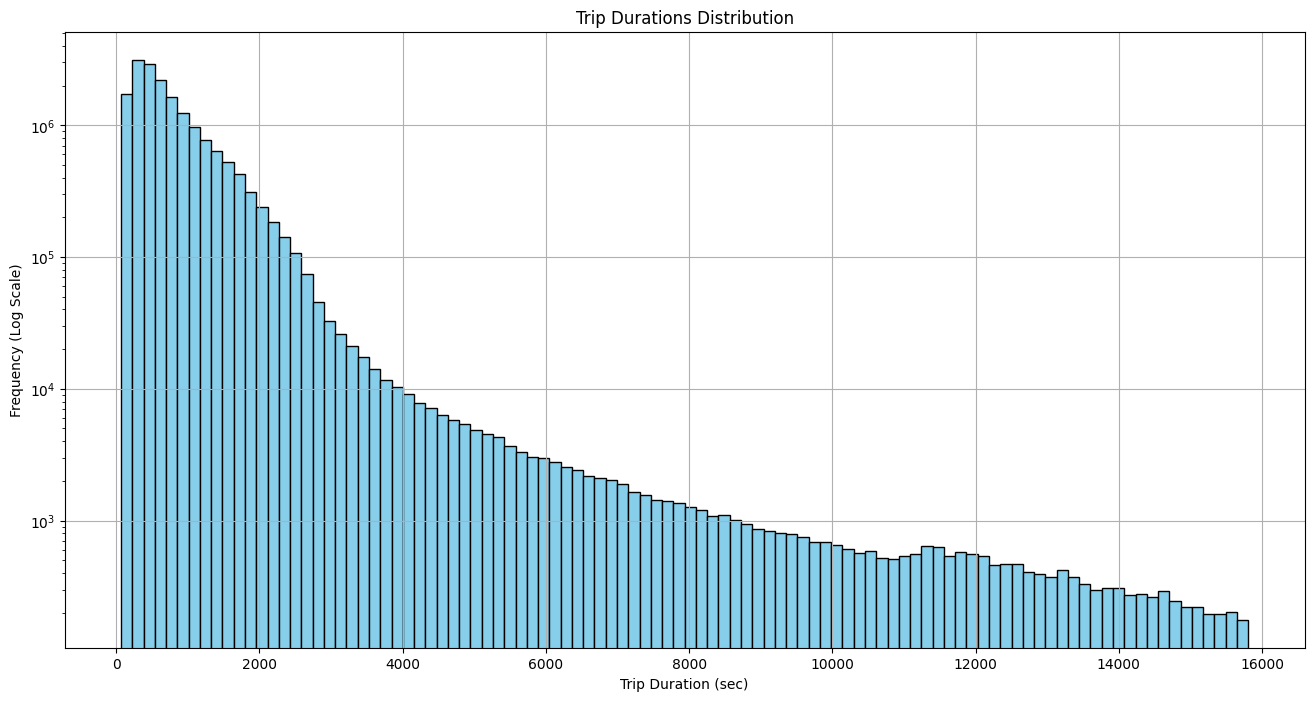

In [21]:
## Plot of the distribution of trip durations
trip_durations = df['tripduration']
plt.figure(figsize=(16, 8))
plt.hist(trip_durations, bins=100, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Trip Durations Distribution')
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
The histogram of user ages for a bike rental service shows a peak in the 30-40 age range, indicating that the core demographic consists of young to middle-aged adults. There is a notable skew towards younger ages, with a gradual decline in frequency past the age of 60, suggesting fewer older adults use the service. Also, an outlier is observed over the age of 120 years which seems quite impossible and suggests a false age.
</div>

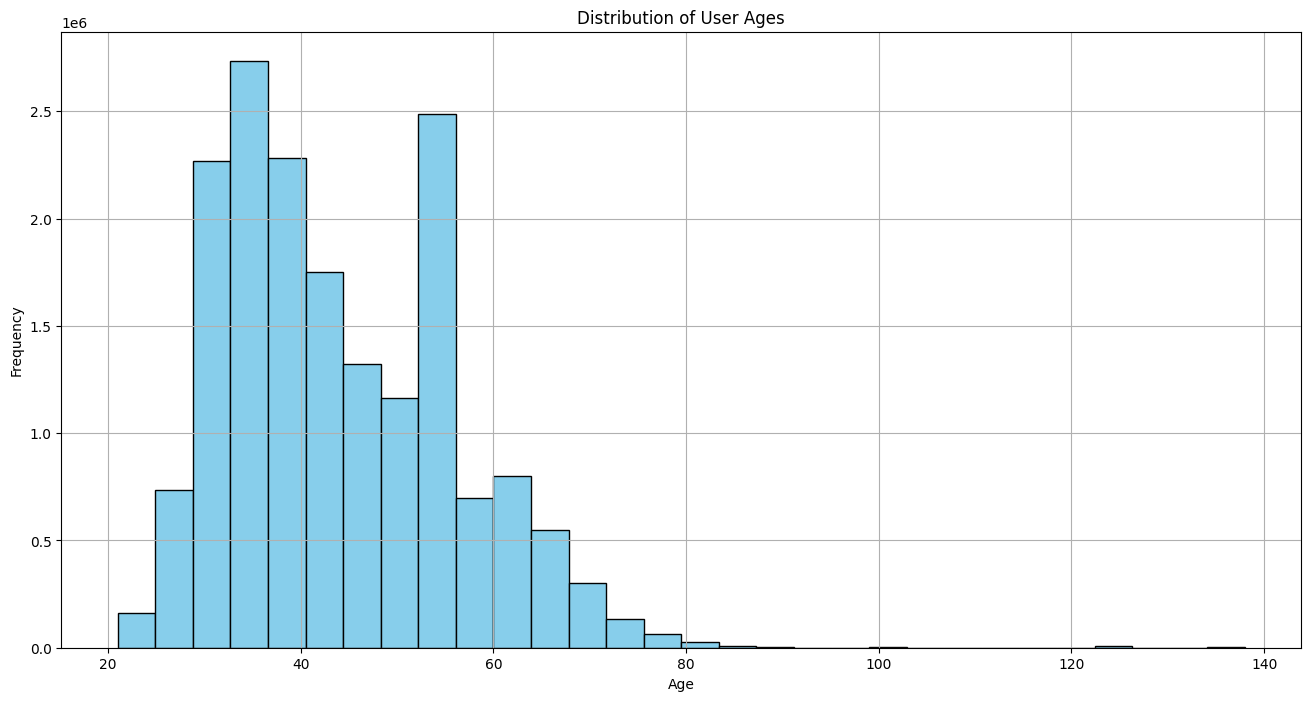

In [22]:
ages = 2023 - df['birth_year']

plt.figure(figsize=(16, 8))
plt.hist(ages, bins=30, color='skyblue', edgecolor='black') 
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()  



<div class="alert alert-block alert-info" style="text-align: center;">
<h2>Clustering</h2></div>


<div class="alert alert-block alert-info">
The analysis begins with the Elbow method to determine the optimal number of clusters for k-means clustering.
</div>

In [23]:
stations = df[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

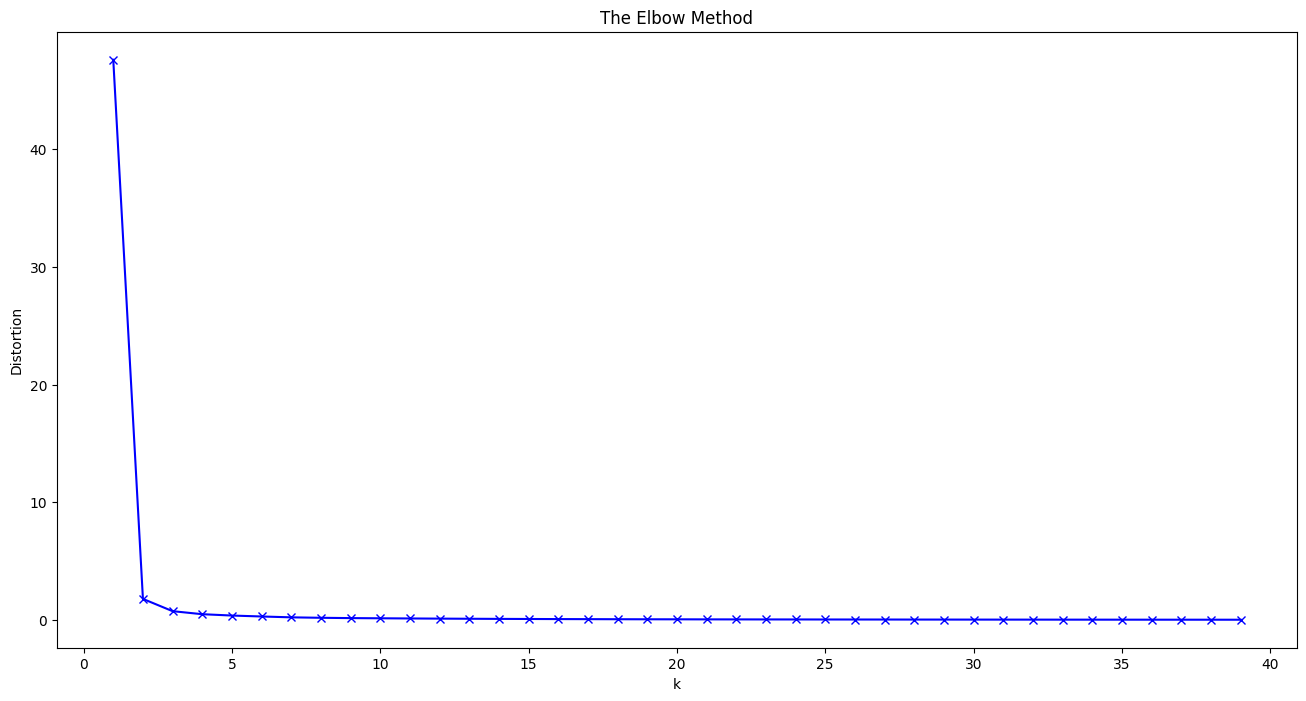

In [24]:
distortions = []

K = range(1, 40) 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(stations[['start_station_latitude', 'start_station_longitude']])
    distortions.append(kmeanModel.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [25]:
stations.head()

,start_station_id,start_station_latitude,start_station_longitude
0,72,40.767272,-73.993929
1324,79,40.719116,-74.006667
2430,82,40.711174,-74.000165
2866,83,40.683826,-73.976323
3551,119,40.696089,-73.978034


<div class="alert alert-block alert-info">
It seems like the optimal number for clustering would be less that 5. But in the framework of the project we need to choose more than 20 number of clusters. A number of 20 clustes is chosen later for clustering as  bigger number does not improve our analysis
</div>

<div class="alert alert-block alert-info">
By taking a look the geographical coordinates of the stations within this cluster, we are leaded to the observation that 2 stations are located in Montreal, Canada by checking their coordinate values. Therefore, later we will discard them because we dont them to affect the visualisation of the stations in the New York scale
</div>

c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


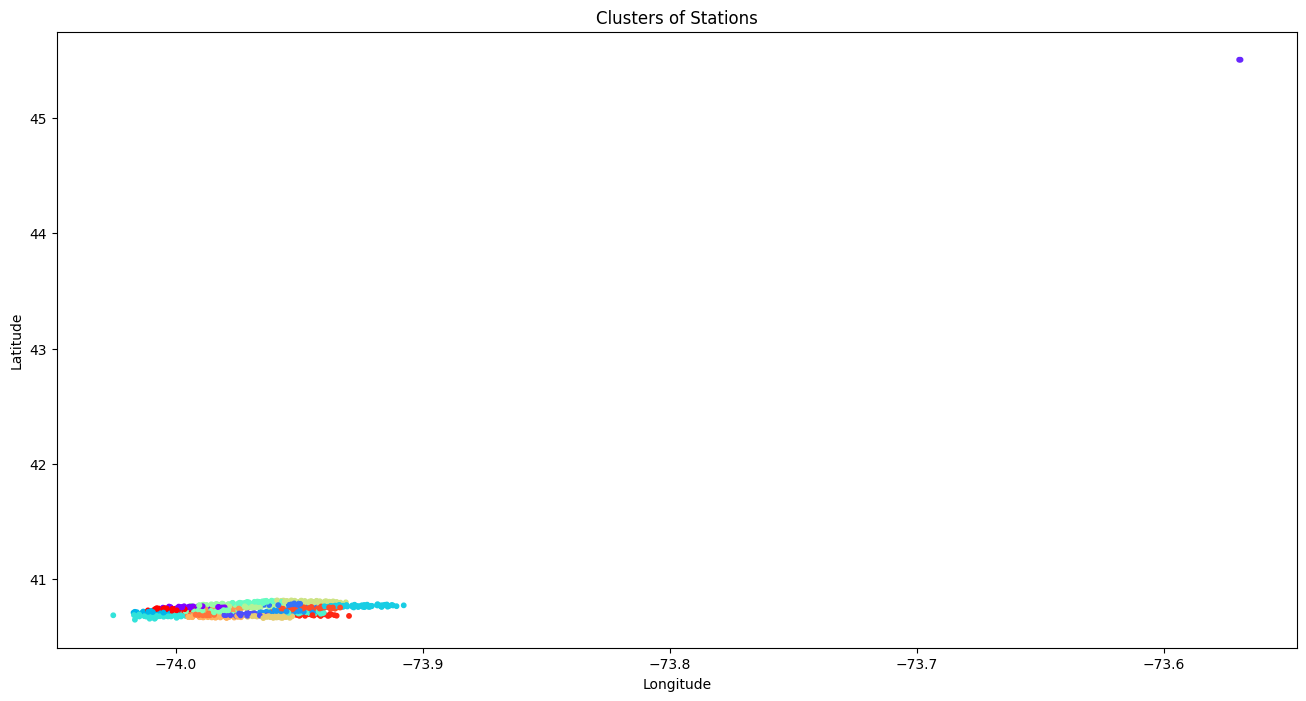

In [26]:
kmeans = KMeans(n_clusters=21, random_state=0).fit(stations[['start_station_latitude', 'start_station_longitude']])
stations['cluster'] = kmeans.labels_

plt.figure(figsize=(16, 8))  
plt.scatter(stations['start_station_longitude'], stations['start_station_latitude'],
            c=stations['cluster'], cmap='rainbow', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Stations')
plt.show()


In [27]:
cluster_1_stations = stations[stations['cluster'] == 1]
print(cluster_1_stations)

        start_station_id  start_station_latitude  start_station_longitude  \
676612              3488               45.506364               -73.569463   
714486              3650               45.506264               -73.568906   

        cluster  
676612        1  
714486        1  


<div class="alert alert-block alert-info">
The distribution of stations across clusters as shown in the bar chart is quite uniform, suggesting a well-distributed set of clusters, if we except cluster number 1 which the cluster with the stations that are located in Canada
</div>

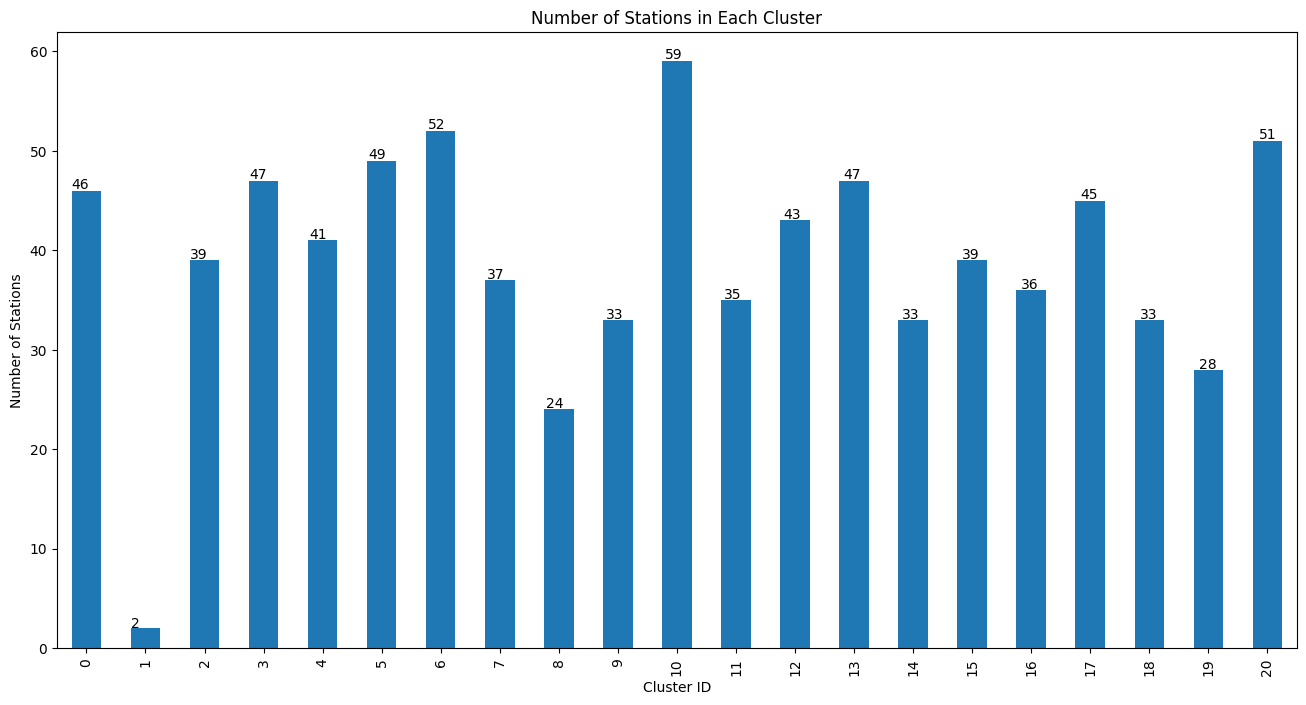

In [28]:
cluster_counts = stations.groupby('cluster').size()

ax = cluster_counts.plot(kind='bar', figsize=(16,8))
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
plt.title('Number of Stations in Each Cluster')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [29]:
# Keep only the stations that are not in cluster 1
stations = stations[stations['cluster'] != 1]

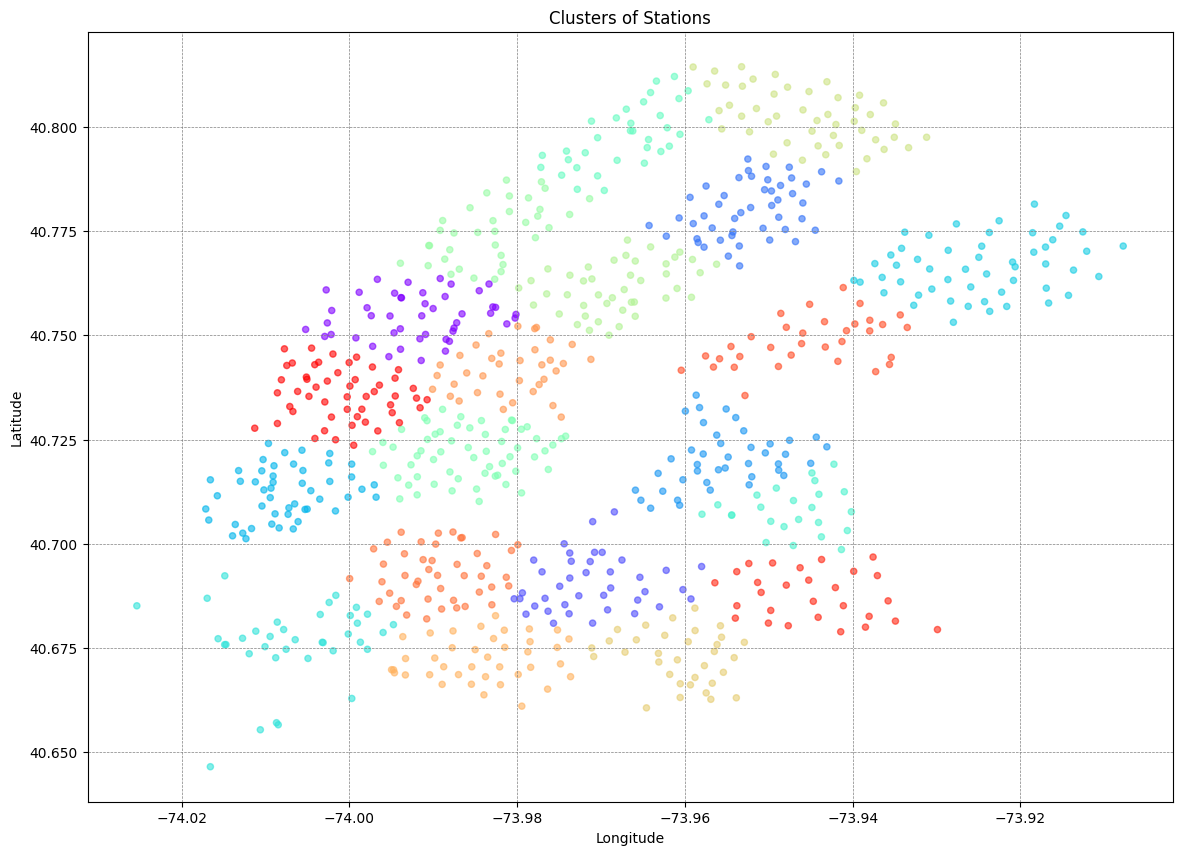

In [30]:
plt.figure(figsize=(14, 10))  
ax = plt.axes()  
ax.set_facecolor('white')
plt.scatter(
    stations['start_station_longitude'], 
    stations['start_station_latitude'], 
    c=stations['cluster'], 
    cmap='rainbow', 
    s=20,  
    alpha=0.6
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Stations')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')  
plt.show()

<div class="alert alert-block alert-info">
By the scatter plot of the coordinates of the stations the shape of some areas of New York can be identified. For example, at the top center part of the plot we can recognize the area of Manhattan as we see that there a white square area with no stations (data points) which is Central Park.
</div>

In [31]:
# Depiction of the stations in an actual interactive map

num_clusters = stations['cluster'].nunique()

colors = sns.color_palette("husl", num_clusters)  
color_palette = {cluster: colors[i] for i, cluster in enumerate(stations['cluster'].unique())}

colors = sns.color_palette("husl", num_clusters)  
color_palette = {cluster: colors[i] for i, cluster in enumerate(stations['cluster'].unique())}

# Create a base map
m = folium.Map(location=[stations['start_station_latitude'].mean(), stations['start_station_longitude'].mean()], zoom_start=13)

# Add markers for each station, color-coded by their cluster
for index, row in stations.iterrows():
    cluster_color = color_palette[row['cluster']]
    folium.CircleMarker(
        location=(row['start_station_latitude'], row['start_station_longitude']),
        radius=5,
        color=mcolors.rgb2hex(cluster_color),  # Convert RGB to hex format
        popup=f"ID: {row['start_station_id']}<br>Cluster: {row['cluster']}",
        fill=True,
        fill_color=mcolors.rgb2hex(cluster_color)
    ).add_to(m)

m

<div class="alert alert-block alert-info">
The the coordinates are plotted again using an interactive map from the `Folium` where you can zoom and check the stations locations in the areas of New York
<br>
Note: For this interactive plot the code cells above have to be runned in order for the map to appear.
</div>

In [32]:
# Add an extra column to the dataframe with the cluster ID
merged_df = df.merge(stations[['start_station_id', 'cluster']], on='start_station_id', how='left')

<div class="alert alert-block alert-info">
The main objective of the project is to build a prediction model that, at the end of a day, allows to
predict what the demand for a cluster of stations will be over the next 24 hours. We are asked to perform thison at least one cluster (e.g., the one with the largest demand. So below we are determining the cluster with the lighest demand in terms of departures
</div>

In [33]:
# Calculate total demand (arrivals) for each cluster
cluster_demand = merged_df.groupby('cluster').size()

# Find the cluster with the highest demand
cluster_highest_demand = cluster_demand.idxmax()

# Create a new DataFrame with data points only from the cluster with the highest demand
df_onecluster = merged_df[merged_df['cluster'] == cluster_highest_demand]

df_onecluster['cluster'].unique()
df_onecluster.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
4181,1176,2018-01-01 01:11:58.481,2018-01-01 01:31:34.729,127,40.731724,-74.006744,382,40.734927,-73.992005,25514,1,1979,2,20.0
4182,1824,2018-01-01 01:12:26.474,2018-01-01 01:42:50.474,127,40.731724,-74.006744,530,40.771522,-73.990541,30370,1,1969,1,20.0
4183,613,2018-01-01 09:55:37.097,2018-01-01 10:05:50.697,127,40.731724,-74.006744,3255,40.750585,-73.994685,25036,1,1966,1,20.0
4184,463,2018-01-01 10:27:30.491,2018-01-01 10:35:13.638,127,40.731724,-74.006744,229,40.727434,-73.993790,33019,1,1992,1,20.0
4185,454,2018-01-01 10:27:52.262,2018-01-01 10:35:26.884,127,40.731724,-74.006744,229,40.727434,-73.993790,27221,1,1991,2,20.0


<div class="alert alert-block alert-info">
We find that Cluster 17 which includes 53 stations is the class with the highest demand in our case.
</div>

<div class="alert alert-block alert-info" style="text-align: center;">
<h2>Prediction - Regression</h2></div>

<div class="alert alert-block alert-info">
Firstly we need to split our data into training and test (Data from January to October (included) to train
the model, and the data from November and December as a test set) with R2 of at least 0.60.
<br>
<br>
For the prediction part and after the dataset has the correct form, we are considering to use 2-linear regression models(one for arrivals and one for dropoffs) as a baseline.
Then we will try to improve the results by using 2-polynomial regression models and a multi-regressor model or an LSTM neural network that works well with time series data.
<br>
<br>
After the prediction of arrivals and departures, the amount of bikes needed for the next day for that cluster will be calculated.   
</div>

In [34]:
merged_df['start_hour'] = merged_df['starttime'].dt.strftime('%Y-%m-%d %H:00:00')
merged_df['stop_hour'] = merged_df['stoptime'].dt.strftime('%Y-%m-%d %H:00:00')

pickups = merged_df.groupby(['start_hour', 'cluster']).size().reset_index(name='pickups')
dropoffs = merged_df.groupby(['stop_hour', 'cluster']).size().reset_index(name='dropoffs')

pickups = pickups.rename(columns={"start_hour": "hour"})
dropoffs = dropoffs.rename(columns={"stop_hour": "hour"})

In [40]:
hourly_data = pd.merge(pickups, dropoffs, on=['hour', 'cluster'], how='outer').fillna(0)

hourly_data['cluster'] = hourly_data['cluster'].astype(int)
hourly_data['pickups'] = hourly_data['pickups'].astype(int)
hourly_data['dropoffs'] = hourly_data['dropoffs'].astype(int)

<div class="alert alert-block alert-info">
The goal is to create a prediction model that finds the arrivals and departures for the next 24 hours (or one model for arrivals and one for departures).
Thus the demand(1-hour time intervals for 24 hours) of each next day will be the target for its previous one! For that purpose, we will add a 'target_arr_dep' or 'target_arriv' and 'target_dep' column/s, that will include the corresponding real values.
    
<br>
<br>
    
We are performing some more data transformation into to bring the data in a more suitable form that can be fed as in put to machine learning algoritms. We see for every hour of the day for each cluster the number of pickups and dropoffs.
</div>

pws kai pote graftike kwdikas gia na mertzarei tis times ana wra

In [41]:
hourly_data.head(24)

,hour,cluster,pickups,dropoffs
0,2018-01-01 00:00:00,0,15,9
1,2018-01-01 00:00:00,2,2,2
2,2018-01-01 00:00:00,3,6,6
3,2018-01-01 00:00:00,4,7,5
4,2018-01-01 00:00:00,5,11,8
5,2018-01-01 00:00:00,6,2,2
6,2018-01-01 00:00:00,8,2,1
7,2018-01-01 00:00:00,9,3,3
8,2018-01-01 00:00:00,10,15,9
9,2018-01-01 00:00:00,11,7,5


In [37]:
## Plot the demand for all the clusters
#plt.figure(figsize=(16, 8))
#for cluster in hourly_data['cluster'].unique():
#    cluster_data = hourly_data[hourly_data['cluster'] == cluster]
#    plt.plot(cluster_data['hour'], cluster_data['pickups'], label=f'Cluster {cluster}')
#plt.xlabel('Hour')
#plt.ylabel('Pickups')
#plt.title('Pickups per Hour for Each Cluster')
#plt.legend()
#plt.show()


In [42]:
# Calculate the 3 clustera with the highest demand in terms of arrivals
top_3_arrclusters = hourly_data.groupby('cluster').sum().sort_values(by='pickups', ascending=False).head(3).index
print('Top 3 in terms of arrivals:', top_3_arrclusters)

# Calculate the 3 clustera with the highest demand in terms of arrivals and departures
top_3_clusters = hourly_data.groupby('cluster').sum().sort_values(by=['pickups', 'dropoffs'], ascending=False).head(3).index
print('Top 3 in terms of arrivals and demand:', top_3_clusters)

Top 3 in terms of arrivals: Index([20, 0, 10], dtype='int32', name='cluster')
Top 3 in terms of arrivals and demand: Index([20, 0, 10], dtype='int32', name='cluster')


In [45]:
# Average the pickups for the first hour of the first day of hourly_data for cluster 20
hourly_data[(hourly_data['cluster'] == 20) & (hourly_data['hour'] == '2018-01-01 00:00:00')]['pickups'].mean()

17.0

In [74]:
# from hourly_data, keep only the data points from cluster 20
hourly_data_top = hourly_data[hourly_data['cluster'] == 20]
hourly_data_top.head(25)

,hour,cluster,pickups,dropoffs
18,2018-01-01 00:00:00,20,17,16
38,2018-01-01 01:00:00,20,30,30
55,2018-01-01 02:00:00,20,11,9
71,2018-01-01 03:00:00,20,7,9
86,2018-01-01 04:00:00,20,7,8
98,2018-01-01 05:00:00,20,1,1
109,2018-01-01 06:00:00,20,2,2
124,2018-01-01 07:00:00,20,7,5
143,2018-01-01 08:00:00,20,14,14
161,2018-01-01 09:00:00,20,14,12


In [75]:
hourly_data_top.shape

(8736, 4)

In [153]:
df_lags_arr = hourly_data_top.copy()
df_lags_dep = hourly_data_top.copy()
df_lags_arr_dep = hourly_data_top.copy()

In [154]:
# Create lag features for the number of pickups
for i in range(1, 25):  # Assuming you want to use the last 24 hours to predict the next 24 hours
    df_lags_arr[f'pickups_lag_{i}'] = hourly_data_top['pickups'].shift(i)
    df_lags_arr[f'pickups_t+{i}'] = hourly_data_top['pickups'].shift(-i)
     
# Drop the rows with NaN values created by shifting
df_lags_arr.dropna(inplace=True)

# Drop dropoffs and cluster columns
df_lags_arr.drop(['dropoffs', 'cluster'], axis=1, inplace=True)

In [155]:
df_lags_arr.head(25)

,hour,pickups,pickups_lag_1,pickups_t+1,pickups_lag_2,pickups_t+2,pickups_lag_3,pickups_t+3,pickups_lag_4,pickups_t+4,...,pickups_lag_20,pickups_t+20,pickups_lag_21,pickups_t+21,pickups_lag_22,pickups_t+22,pickups_lag_23,pickups_t+23,pickups_lag_24,pickups_t+24
450,2018-01-02 00:00:00,7,7.0,4.0,15.0,2.0,19.0,2.0,36.0,4.0,...,7.0,96.0,7.0,62.0,11.0,41.0,30.0,22.0,17.0,20.0
460,2018-01-02 01:00:00,4,7.0,2.0,7.0,2.0,15.0,4.0,19.0,14.0,...,1.0,62.0,7.0,41.0,7.0,22.0,11.0,20.0,30.0,7.0
469,2018-01-02 02:00:00,2,4.0,2.0,7.0,4.0,7.0,14.0,15.0,49.0,...,2.0,41.0,1.0,22.0,7.0,20.0,7.0,7.0,11.0,3.0
474,2018-01-02 03:00:00,2,2.0,4.0,4.0,14.0,7.0,49.0,7.0,96.0,...,7.0,22.0,2.0,20.0,1.0,7.0,7.0,3.0,7.0,5.0
487,2018-01-02 04:00:00,4,2.0,14.0,2.0,49.0,4.0,96.0,7.0,183.0,...,14.0,20.0,7.0,7.0,2.0,3.0,1.0,5.0,7.0,6.0
505,2018-01-02 05:00:00,14,4.0,49.0,2.0,96.0,2.0,183.0,4.0,155.0,...,14.0,7.0,14.0,3.0,7.0,5.0,2.0,6.0,1.0,21.0
525,2018-01-02 06:00:00,49,14.0,96.0,4.0,183.0,2.0,155.0,2.0,85.0,...,29.0,3.0,14.0,5.0,14.0,6.0,7.0,21.0,2.0,78.0
545,2018-01-02 07:00:00,96,49.0,183.0,14.0,155.0,4.0,85.0,2.0,99.0,...,47.0,5.0,29.0,6.0,14.0,21.0,14.0,78.0,7.0,143.0
565,2018-01-02 08:00:00,183,96.0,155.0,49.0,85.0,14.0,99.0,4.0,105.0,...,38.0,6.0,47.0,21.0,29.0,78.0,14.0,143.0,14.0,248.0
585,2018-01-02 09:00:00,155,183.0,85.0,96.0,99.0,49.0,105.0,14.0,109.0,...,42.0,21.0,38.0,78.0,47.0,143.0,29.0,248.0,14.0,217.0


In [157]:
df_lags_arr.columns

Index(['hour', 'pickups', 'pickups_lag_1', 'pickups_t+1', 'pickups_lag_2',
       'pickups_t+2', 'pickups_lag_3', 'pickups_t+3', 'pickups_lag_4',
       'pickups_t+4', 'pickups_lag_5', 'pickups_t+5', 'pickups_lag_6',
       'pickups_t+6', 'pickups_lag_7', 'pickups_t+7', 'pickups_lag_8',
       'pickups_t+8', 'pickups_lag_9', 'pickups_t+9', 'pickups_lag_10',
       'pickups_t+10', 'pickups_lag_11', 'pickups_t+11', 'pickups_lag_12',
       'pickups_t+12', 'pickups_lag_13', 'pickups_t+13', 'pickups_lag_14',
       'pickups_t+14', 'pickups_lag_15', 'pickups_t+15', 'pickups_lag_16',
       'pickups_t+16', 'pickups_lag_17', 'pickups_t+17', 'pickups_lag_18',
       'pickups_t+18', 'pickups_lag_19', 'pickups_t+19', 'pickups_lag_20',
       'pickups_t+20', 'pickups_lag_21', 'pickups_t+21', 'pickups_lag_22',
       'pickups_t+22', 'pickups_lag_23', 'pickups_t+23', 'pickups_lag_24',
       'pickups_t+24'],
      dtype='object')

In [135]:
# Create lag features for the number of dropoffs
for i in range(1, 25):  # Assuming you want to use the last 24 hours to predict the next 24 hours
    df_lags_dep[f'dropoffs_lag_{i}'] = hourly_data_top['dropoffs'].shift(i)

# Drop the rows with NaN values created by shifting
df_lags_dep.dropna(inplace=True)

# Drop pickups and cluster columns
df_lags_dep.drop(['pickups', 'cluster'], axis=1, inplace=True)

In [136]:
df_lags_dep.head(25)

,hour,dropoffs,dropoffs_lag_1,dropoffs_lag_2,dropoffs_lag_3,dropoffs_lag_4,dropoffs_lag_5,dropoffs_lag_6,dropoffs_lag_7,dropoffs_lag_8,...,dropoffs_lag_15,dropoffs_lag_16,dropoffs_lag_17,dropoffs_lag_18,dropoffs_lag_19,dropoffs_lag_20,dropoffs_lag_21,dropoffs_lag_22,dropoffs_lag_23,dropoffs_lag_24
450,2018-01-02 00:00:00,10,7.0,15.0,21.0,41.0,40.0,55.0,67.0,59.0,...,12.0,14.0,5.0,2.0,1.0,8.0,9.0,9.0,30.0,16.0
460,2018-01-02 01:00:00,4,10.0,7.0,15.0,21.0,41.0,40.0,55.0,67.0,...,30.0,12.0,14.0,5.0,2.0,1.0,8.0,9.0,9.0,30.0
469,2018-01-02 02:00:00,2,4.0,10.0,7.0,15.0,21.0,41.0,40.0,55.0,...,43.0,30.0,12.0,14.0,5.0,2.0,1.0,8.0,9.0,9.0
474,2018-01-02 03:00:00,2,2.0,4.0,10.0,7.0,15.0,21.0,41.0,40.0,...,38.0,43.0,30.0,12.0,14.0,5.0,2.0,1.0,8.0,9.0
487,2018-01-02 04:00:00,4,2.0,2.0,4.0,10.0,7.0,15.0,21.0,41.0,...,43.0,38.0,43.0,30.0,12.0,14.0,5.0,2.0,1.0,8.0
505,2018-01-02 05:00:00,14,4.0,2.0,2.0,4.0,10.0,7.0,15.0,21.0,...,46.0,43.0,38.0,43.0,30.0,12.0,14.0,5.0,2.0,1.0
525,2018-01-02 06:00:00,39,14.0,4.0,2.0,2.0,4.0,10.0,7.0,15.0,...,47.0,46.0,43.0,38.0,43.0,30.0,12.0,14.0,5.0,2.0
545,2018-01-02 07:00:00,88,39.0,14.0,4.0,2.0,2.0,4.0,10.0,7.0,...,59.0,47.0,46.0,43.0,38.0,43.0,30.0,12.0,14.0,5.0
565,2018-01-02 08:00:00,160,88.0,39.0,14.0,4.0,2.0,2.0,4.0,10.0,...,67.0,59.0,47.0,46.0,43.0,38.0,43.0,30.0,12.0,14.0
585,2018-01-02 09:00:00,174,160.0,88.0,39.0,14.0,4.0,2.0,2.0,4.0,...,55.0,67.0,59.0,47.0,46.0,43.0,38.0,43.0,30.0,12.0


In [137]:
# Create lag features for the number of pickups and dropoffs
for i in range(1, 25):  # Assuming you want to use the last 24 hours to predict the next 24 hours
    df_lags_arr_dep[f'pickups_lag_{i}'] = hourly_data_top['pickups'].shift(i)
    df_lags_arr_dep[f'dropoffs_lag_{i}'] = hourly_data_top['dropoffs'].shift(i)

# Drop the rows with NaN values created by shifting
df_lags_arr_dep.dropna(inplace=True)

# Drop cluster column
#df_lags_arr_dep.drop(['cluster'], axis=1, inplace=True)


In [138]:
df_lags_arr_dep.head(25)

,hour,cluster,pickups,dropoffs,pickups_lag_1,dropoffs_lag_1,pickups_lag_2,dropoffs_lag_2,pickups_lag_3,dropoffs_lag_3,...,pickups_lag_20,dropoffs_lag_20,pickups_lag_21,dropoffs_lag_21,pickups_lag_22,dropoffs_lag_22,pickups_lag_23,dropoffs_lag_23,pickups_lag_24,dropoffs_lag_24
450,2018-01-02 00:00:00,20,7,10,7.0,7.0,15.0,15.0,19.0,21.0,...,7.0,8.0,7.0,9.0,11.0,9.0,30.0,30.0,17.0,16.0
460,2018-01-02 01:00:00,20,4,4,7.0,10.0,7.0,7.0,15.0,15.0,...,1.0,1.0,7.0,8.0,7.0,9.0,11.0,9.0,30.0,30.0
469,2018-01-02 02:00:00,20,2,2,4.0,4.0,7.0,10.0,7.0,7.0,...,2.0,2.0,1.0,1.0,7.0,8.0,7.0,9.0,11.0,9.0
474,2018-01-02 03:00:00,20,2,2,2.0,2.0,4.0,4.0,7.0,10.0,...,7.0,5.0,2.0,2.0,1.0,1.0,7.0,8.0,7.0,9.0
487,2018-01-02 04:00:00,20,4,4,2.0,2.0,2.0,2.0,4.0,4.0,...,14.0,14.0,7.0,5.0,2.0,2.0,1.0,1.0,7.0,8.0
505,2018-01-02 05:00:00,20,14,14,4.0,4.0,2.0,2.0,2.0,2.0,...,14.0,12.0,14.0,14.0,7.0,5.0,2.0,2.0,1.0,1.0
525,2018-01-02 06:00:00,20,49,39,14.0,14.0,4.0,4.0,2.0,2.0,...,29.0,30.0,14.0,12.0,14.0,14.0,7.0,5.0,2.0,2.0
545,2018-01-02 07:00:00,20,96,88,49.0,39.0,14.0,14.0,4.0,4.0,...,47.0,43.0,29.0,30.0,14.0,12.0,14.0,14.0,7.0,5.0
565,2018-01-02 08:00:00,20,183,160,96.0,88.0,49.0,39.0,14.0,14.0,...,38.0,38.0,47.0,43.0,29.0,30.0,14.0,12.0,14.0,14.0
585,2018-01-02 09:00:00,20,155,174,183.0,160.0,96.0,88.0,49.0,39.0,...,42.0,43.0,38.0,38.0,47.0,43.0,29.0,30.0,14.0,12.0


### 2 Models one for arrivals and one for departures

1) First model only for ARRIVALS

In [162]:
print(df_lags_arr.shape)
#df_lags_dep
# Now split the data into training and test sets based on the date
train_data = df_lags_arr[(df_lags_arr['hour'] >= '2018-01-02') & (df_lags_arr['hour'] <= '2018-10-31')]
test_data = df_lags_arr[(df_lags_arr['hour'] >= '2018-11-01') & (df_lags_arr['hour'] <= '2018-12-31')]

# Check the first few rows of the training data
print('train:', train_data.shape)

# Check the first few rows of the test data
print('test:', test_data.shape)

(8688, 50)
train: (7218, 50)
test: (1439, 50)


In [165]:
train_data.head()

,hour,pickups,pickups_lag_1,pickups_t+1,pickups_lag_2,pickups_t+2,pickups_lag_3,pickups_t+3,pickups_lag_4,pickups_t+4,...,pickups_lag_20,pickups_t+20,pickups_lag_21,pickups_t+21,pickups_lag_22,pickups_t+22,pickups_lag_23,pickups_t+23,pickups_lag_24,pickups_t+24
450,2018-01-02 00:00:00,7,7.0,4.0,15.0,2.0,19.0,2.0,36.0,4.0,...,7.0,96.0,7.0,62.0,11.0,41.0,30.0,22.0,17.0,20.0
460,2018-01-02 01:00:00,4,7.0,2.0,7.0,2.0,15.0,4.0,19.0,14.0,...,1.0,62.0,7.0,41.0,7.0,22.0,11.0,20.0,30.0,7.0
469,2018-01-02 02:00:00,2,4.0,2.0,7.0,4.0,7.0,14.0,15.0,49.0,...,2.0,41.0,1.0,22.0,7.0,20.0,7.0,7.0,11.0,3.0
474,2018-01-02 03:00:00,2,2.0,4.0,4.0,14.0,7.0,49.0,7.0,96.0,...,7.0,22.0,2.0,20.0,1.0,7.0,7.0,3.0,7.0,5.0
487,2018-01-02 04:00:00,4,2.0,14.0,2.0,49.0,4.0,96.0,7.0,183.0,...,14.0,20.0,7.0,7.0,2.0,3.0,1.0,5.0,7.0,6.0


In [163]:
# If you need to separate the features and targets later, you can do so:
X_train = train_data[[col for col in train_data.columns if 'lag' in col]]
y_train = train_data[[col for col in train_data.columns if 't+' in col]]

X_test = test_data[[col for col in test_data.columns if 'lag' in col]]
y_test = test_data[[col for col in test_data.columns if 't+' in col]]

In [166]:
y_train.head()

,pickups_t+1,pickups_t+2,pickups_t+3,pickups_t+4,pickups_t+5,pickups_t+6,pickups_t+7,pickups_t+8,pickups_t+9,pickups_t+10,...,pickups_t+15,pickups_t+16,pickups_t+17,pickups_t+18,pickups_t+19,pickups_t+20,pickups_t+21,pickups_t+22,pickups_t+23,pickups_t+24
450,4.0,2.0,2.0,4.0,14.0,49.0,96.0,183.0,155.0,85.0,...,121.0,151.0,256.0,243.0,151.0,96.0,62.0,41.0,22.0,20.0
460,2.0,2.0,4.0,14.0,49.0,96.0,183.0,155.0,85.0,99.0,...,151.0,256.0,243.0,151.0,96.0,62.0,41.0,22.0,20.0,7.0
469,2.0,4.0,14.0,49.0,96.0,183.0,155.0,85.0,99.0,105.0,...,256.0,243.0,151.0,96.0,62.0,41.0,22.0,20.0,7.0,3.0
474,4.0,14.0,49.0,96.0,183.0,155.0,85.0,99.0,105.0,109.0,...,243.0,151.0,96.0,62.0,41.0,22.0,20.0,7.0,3.0,5.0
487,14.0,49.0,96.0,183.0,155.0,85.0,99.0,105.0,109.0,121.0,...,151.0,96.0,62.0,41.0,22.0,20.0,7.0,3.0,5.0,6.0


In [168]:
# make x_train, y_train, x_test, y_test
#X_train = X_train.drop(['hour', 'pickups', 'cluster'], axis=1)
X_train.head()

,pickups_lag_1,pickups_lag_2,pickups_lag_3,pickups_lag_4,pickups_lag_5,pickups_lag_6,pickups_lag_7,pickups_lag_8,pickups_lag_9,pickups_lag_10,...,pickups_lag_15,pickups_lag_16,pickups_lag_17,pickups_lag_18,pickups_lag_19,pickups_lag_20,pickups_lag_21,pickups_lag_22,pickups_lag_23,pickups_lag_24
450,7.0,15.0,19.0,36.0,45.0,55.0,58.0,66.0,47.0,47.0,...,14.0,14.0,7.0,2.0,1.0,7.0,7.0,11.0,30.0,17.0
460,7.0,7.0,15.0,19.0,36.0,45.0,55.0,58.0,66.0,47.0,...,29.0,14.0,14.0,7.0,2.0,1.0,7.0,7.0,11.0,30.0
469,4.0,7.0,7.0,15.0,19.0,36.0,45.0,55.0,58.0,66.0,...,47.0,29.0,14.0,14.0,7.0,2.0,1.0,7.0,7.0,11.0
474,2.0,4.0,7.0,7.0,15.0,19.0,36.0,45.0,55.0,58.0,...,38.0,47.0,29.0,14.0,14.0,7.0,2.0,1.0,7.0,7.0
487,2.0,2.0,4.0,7.0,7.0,15.0,19.0,36.0,45.0,55.0,...,42.0,38.0,47.0,29.0,14.0,14.0,7.0,2.0,1.0,7.0


In [169]:
X_test.head()

,pickups_lag_1,pickups_lag_2,pickups_lag_3,pickups_lag_4,pickups_lag_5,pickups_lag_6,pickups_lag_7,pickups_lag_8,pickups_lag_9,pickups_lag_10,...,pickups_lag_15,pickups_lag_16,pickups_lag_17,pickups_lag_18,pickups_lag_19,pickups_lag_20,pickups_lag_21,pickups_lag_22,pickups_lag_23,pickups_lag_24
140908,237.0,344.0,438.0,497.0,525.0,759.0,829.0,615.0,533.0,506.0,...,545.0,714.0,358.0,180.0,45.0,16.0,7.0,18.0,26.0,48.0
140928,98.0,237.0,344.0,438.0,497.0,525.0,759.0,829.0,615.0,533.0,...,386.0,545.0,714.0,358.0,180.0,45.0,16.0,7.0,18.0,26.0
140946,57.0,98.0,237.0,344.0,438.0,497.0,525.0,759.0,829.0,615.0,...,352.0,386.0,545.0,714.0,358.0,180.0,45.0,16.0,7.0,18.0
140961,26.0,57.0,98.0,237.0,344.0,438.0,497.0,525.0,759.0,829.0,...,456.0,352.0,386.0,545.0,714.0,358.0,180.0,45.0,16.0,7.0
140979,16.0,26.0,57.0,98.0,237.0,344.0,438.0,497.0,525.0,759.0,...,480.0,456.0,352.0,386.0,545.0,714.0,358.0,180.0,45.0,16.0


In [170]:
y_test.head()

,pickups_t+1,pickups_t+2,pickups_t+3,pickups_t+4,pickups_t+5,pickups_t+6,pickups_t+7,pickups_t+8,pickups_t+9,pickups_t+10,...,pickups_t+15,pickups_t+16,pickups_t+17,pickups_t+18,pickups_t+19,pickups_t+20,pickups_t+21,pickups_t+22,pickups_t+23,pickups_t+24
140908,57.0,26.0,16.0,21.0,56.0,174.0,350.0,653.0,582.0,389.0,...,535.0,683.0,984.0,1071.0,727.0,497.0,398.0,247.0,176.0,88.0
140928,26.0,16.0,21.0,56.0,174.0,350.0,653.0,582.0,389.0,411.0,...,683.0,984.0,1071.0,727.0,497.0,398.0,247.0,176.0,88.0,34.0
140946,16.0,21.0,56.0,174.0,350.0,653.0,582.0,389.0,411.0,472.0,...,984.0,1071.0,727.0,497.0,398.0,247.0,176.0,88.0,34.0,20.0
140961,21.0,56.0,174.0,350.0,653.0,582.0,389.0,411.0,472.0,503.0,...,1071.0,727.0,497.0,398.0,247.0,176.0,88.0,34.0,20.0,15.0
140979,56.0,174.0,350.0,653.0,582.0,389.0,411.0,472.0,503.0,511.0,...,727.0,497.0,398.0,247.0,176.0,88.0,34.0,20.0,15.0,11.0


In [171]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7218, 24) (7218, 24) (1439, 24) (1439, 24)


In [186]:
model_pickups = LinearRegression()

# Train the models
model_pickups.fit(X_train, y_train)

# Make predictions
y_pred = model_pickups.predict(X_test)

# Evaluate the models
mse_pickups = mean_squared_error(y_test, y_pred)
rmse = mse_pickups ** 0.5
print(f'MSE: {mse_pickups}')
print(f'RMSE: {rmse}')

MSE: 14832.407655078094
RMSE: 121.7883724132895


In [189]:
from tqdm import tqdm


# Initialize models for each hour
models = [LinearRegression() for _ in range(y_train.shape[1])]

# Train the models and make predictions
y_preds = []

for i in tqdm(range(y_train.shape[1]), desc='Training models'):
    # Fit model to the training data for the current target hour
    models[i].fit(X_train, y_train.iloc[:, i])
    
    # Make predictions for the current target hour
    y_pred = models[i].predict(X_test)
    y_preds.append(y_pred)

# Convert the list of predictions to a 2D array (if needed)
y_preds = np.array(y_preds).T

# Evaluate the models
mse_pickups = mean_squared_error(y_test, y_preds, multioutput='raw_values')
rmse_pickups = np.sqrt(mse_pickups)

for i, (mse, rmse) in enumerate(zip(mse_pickups, rmse_pickups), start=1):
    print(f'Hour {i} - MSE: {mse}')
    print(f'Hour {i} - RMSE: {rmse}')


Training models: 100%|██████████| 24/24 [00:00<00:00, 133.65it/s]

Hour 1 - MSE: 8411.232401804544
Hour 1 - RMSE: 91.71277120338554
Hour 2 - MSE: 11770.489051271574
Hour 2 - RMSE: 108.49188472540965
Hour 3 - MSE: 13728.94584700633
Hour 3 - RMSE: 117.17058439303923
Hour 4 - MSE: 14880.468040500606
Hour 4 - RMSE: 121.98552389730762
Hour 5 - MSE: 15412.610117445165
Hour 5 - RMSE: 124.14753367443578
Hour 6 - MSE: 15666.288658107798
Hour 6 - RMSE: 125.16504567213563
Hour 7 - MSE: 15668.319620343502
Hour 7 - RMSE: 125.17315854584601
Hour 8 - MSE: 15567.798169672986
Hour 8 - RMSE: 124.77098288333303
Hour 9 - MSE: 15460.21476800539
Hour 9 - RMSE: 124.33911198012228
Hour 10 - MSE: 15437.399449354703
Hour 10 - RMSE: 124.24733175949777
Hour 11 - MSE: 15359.948926963916
Hour 11 - RMSE: 123.93526103157211
Hour 12 - MSE: 15385.444798426382
Hour 12 - RMSE: 124.03807801810855
Hour 13 - MSE: 15360.872334187197
Hour 13 - RMSE: 123.93898633677459
Hour 14 - MSE: 15385.575538469995
Hour 14 - RMSE: 124.03860503274775
Hour 15 - MSE: 15445.141321266947
Hour 15 - RMSE: 124.27

In [182]:
from sklearn.preprocessing import PolynomialFeatures


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
model_pickups = LinearRegression()

# Train the models
model_pickups.fit(X_train, y_train)

# Make predictions
y_pred = model_pickups.predict(X_test)

# Evaluate the models
mse_pickups = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse_pickups}')

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

<div class="alert alert-block alert-info" style="text-align: center;">
<h2>Exploratory Component</h2></div>

<div class="alert alert-block alert-info">
In line with the project's exploratory objectives and to further enhance our analytical framework, we intend to expand our dataset by incorporating weather data for the year 2018. This extension is based on the logic that weather conditions have an important impact on bike rental patterns. We will consider integrating temperature, precipitation, wind speed, and other meteorological parameters,to see at what extent which weather variables correlate with bike rental frequency and duration.

Moreover, we will look to extend our dataset with information about national holidays and special events within the same time frame. Such data could provide valuable insights into usage anomalies on specific days, thereby allowing us to refine our predictive models with a higher degree of accuracy.</div>